In [1]:
//%jsroot on

In [2]:
TCanvas *c1=new TCanvas;

In [3]:
Double_t runtime_low[810],runtime_high[810];
Int_t therunnumber;
Double_t aaa,lowhour,lowsecond,highhour,highsecond,theday;
ifstream inday("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/15C_CH2_time_run.txt");
  if(inday.is_open()){
    while(!inday.eof())
    {
      inday>>theday>>therunnumber>>lowhour>>lowsecond>>highhour>>highsecond;
      theday=theday-20221100;
      cout<<theday<<'\t'<<therunnumber<<'\t'<<lowhour<<'\t'<<lowsecond<<'\t'<<highhour<<'\t'<<lowsecond<<'\n';
      runtime_low[therunnumber] =theday*24+lowhour+lowsecond/60;
      runtime_high[therunnumber]=theday*24+highhour+highsecond/60;
      if(lowhour>highhour)runtime_high[therunnumber]+=24;
      cout<<"runnumber="<<therunnumber<<'\t'<<"lowtime="<<runtime_low[therunnumber]<<'\t'<<"hightime="<<runtime_high[therunnumber]<<'\t'<<runtime_high[therunnumber]-runtime_low[therunnumber]<<'\n';
      if(therunnumber==809)break;
    }
  }
  inday.close();

In [4]:
  TGraph *gaccpttedrate=new TGraph();
Double_t accpttedrate[810],hhh,temprate;
Int_t countrate=0;
ifstream inr("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/trigger_accepted_rate.txt");
  if(inr.is_open()){
    while(!inr.eof())
    {
      inr>>therunnumber>>hhh>>hhh>>hhh>>hhh>>temprate;
      accpttedrate[therunnumber]=temprate;
      gaccpttedrate->SetPoint(countrate++,therunnumber,accpttedrate[therunnumber]);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr.close();

In [5]:
  TGraph *gCrate=new TGraph();
  TGraph *gtarrate=new TGraph();
  Double_t Crate[810],tarrate[810],tempCrate,temptarrate;
  Int_t countrateC=0,countratetar=0;
ifstream inr1("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/15C_CH2_Crate_tarrate.txt");
  if(inr1.is_open()){
    while(!inr1.eof())
    {
      inr1>>therunnumber>>tempCrate>>temptarrate;
      Crate[therunnumber]=tempCrate;
      tarrate[therunnumber]=temptarrate;
      gCrate->SetPoint(countrateC++,therunnumber,Crate[therunnumber]);
      gtarrate->SetPoint(countratetar++,therunnumber,tarrate[therunnumber]);
      //cout<<therunnumber<<'\t'<<rate[therunnumber]<<'\n';
    }
  }
  inr1.close();

In [6]:
  Double_t C15CH2fenchu1=3;
  Double_t key=0;
  Int_t nowfenchu;
  int i;
  TGraph *gt0M=new TGraph();
  TGraph *gt0MB=new TGraph();
  TGraph *gt0S=new TGraph();
  TGraph *gxtaf=new TGraph();
  TGraph *gvtaf=new TGraph();
  TGraph *gt1d1=new TGraph();
  Double_t th;
  Double_t a3,a2,tmp1,tmp2,tmp3,tmp4,tmp5,ttime;
  Double_t t0dMall[810],t0MBall[810],t0sall[810],t0dM,t0MB,t0s;
  Double_t xtafall[810],vtafall[810],t1d1all[810];
  Double_t t0d1M,t0d2M,taf2,taf3,taf4,taf5,vtaf,t1d1,xtaf,t1andt2;
  Double_t t0realall[810];
  for(Int_t ii=0;ii<810;ii++){
      t0dMall[ii]=0;
      t0MBall[ii]=0;
      t0sall[ii]=0;
      t0realall[ii]=0;
  }

  TString fileName;
Int_t thecount=0;
therunnumber=0;
for(Int_t iii=0;iii<=5;iii++){
  fileName = TString::Format("/data/d1/share/pwl/scaler-data/202211%02d.txt",iii+2);
  ifstream in(fileName.Data());
  if(in.is_open()){
    while(!in.eof())
    {
      in>>ttime>>tmp2>>tmp3>>tmp4>>t0s>>t0dM>>t0d1M>>t0d2M>>tmp4>>taf2
        >>taf3>>taf4>>taf5>>vtaf>>tmp5>>tmp1>>t0MB>>t1d1>>xtaf>>tmp5
        >>tmp1>>t1andt2>>tmp3>>tmp4>>tmp5>>tmp1>>a3>>tmp3>>tmp4>>tmp5
        >>tmp1>>tmp2>>tmp3;
        th=ttime/3600.+24.*(iii+2);
        for(Int_t ii=0;ii<33;ii++)if(th>runtime_low[420+ii]&&th<runtime_high[420+ii])therunnumber=420+ii;
        if(th>runtime_high[452])therunnumber=0;
        if(therunnumber==0)nowfenchu=100;
        else if(therunnumber==1)nowfenchu=10;
        else if(therunnumber==2||therunnumber==3)nowfenchu=5;
        else if(therunnumber==4||therunnumber==5)nowfenchu=1;
        else if(therunnumber==6)nowfenchu=5;
        else if(therunnumber==7)nowfenchu=2;
        else if(therunnumber>=8)nowfenchu=3;
        thecount++;
        
        t0dMall[therunnumber]+=t0dM;
        t0MBall[therunnumber]+=t0MB;
        t0sall[therunnumber]+=t0s*nowfenchu;
        xtafall[therunnumber]+=xtaf;
        vtafall[therunnumber]+=vtaf;
        t1d1all[therunnumber]+=t1d1;
        if(thecount%1000==0&&therunnumber>=451)cout<<"t="<<th<<'\t'<<"runnumber="<<therunnumber<<'\t'<<"t0Sall="<<t0sall[therunnumber]<<'\t'<<"t0S="<<t0s*nowfenchu<<'\n';
    }
  }
  in.close();
}

therunnumber=0;
thecount=0;
for(Int_t iii=0;iii<=1;iii++){
  fileName = TString::Format("/data/d1/share/pwl/scaler-data/202211%02d.txt",iii+16);
  ifstream in(fileName.Data());
  if(in.is_open()){
    while(!in.eof())
    {
      in>>ttime>>tmp2>>tmp3>>tmp4>>t0s>>t0dM>>t0d1M>>t0d2M>>tmp4>>taf2
        >>taf3>>taf4>>taf5>>vtaf>>tmp5>>tmp1>>t0MB>>t1d1>>xtaf>>tmp5
        >>tmp1>>t1andt2>>tmp3>>tmp4>>tmp5>>tmp1>>a3>>tmp3>>tmp4>>tmp5
        >>tmp1>>tmp2>>tmp3;
        th=ttime/3600.+24.*(iii+16);
        for(Int_t ii=0;ii<33;ii++)if(th>runtime_low[799+ii]&&th<runtime_high[799+ii])therunnumber=799+ii;
        nowfenchu=100;
        thecount++;
        t0dMall[therunnumber]+=t0dM;
        t0MBall[therunnumber]+=t0MB;
        t0sall[therunnumber]+=t0s*nowfenchu;
        xtafall[therunnumber]+=xtaf;
        vtafall[therunnumber]+=vtaf;
        t1d1all[therunnumber]+=t1d1;
        //if(therunnumber>=799&&therunnumber<=801&thecount%10==0)cout<<"t="<<th<<'\t'<<"runnumber="<<therunnumber<<'\t'<<"t0Sall="<<t0sall[therunnumber]<<'\t'<<"t0S="<<t0s*nowfenchu<<'\n';
    }
  }
  in.close();
}

In [7]:
  TGraph *gMBtoM=new TGraph();
  Int_t count=0;
  Int_t countt0S=0;
  Double_t t0dMallall1,t0MBallall1;
  Double_t t0dMallall2,t0MBallall2;

  for(Int_t ii=420;ii<=452;ii++){
    //if((runtime_high[ii]-runtime_low[ii])<0.25){cout<<ii<<'\t'<<"too small run to count!"<<'\n';continue;}
    //cout<<ii<<'\t'<<runtime_high[ii]-runtime_low[ii]<<'\t'<<t0sall[ii]<<'\n';
    gt0S->SetPoint(countt0S++,ii,t0sall[ii]);
    gMBtoM->SetPoint(count++,ii,(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii]));
    t0dMallall1+=t0dMall[ii];
    t0MBallall1+=t0MBall[ii];
    //cout<<ii<<'\t'<<t0sall[ii]<<'\t'<<t0dMall[ii]<<'\t'<<t0MBall[ii]<<'\t'<<(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii])<<'\n';
  }
  for(Int_t ii=799;ii<809;ii++){
    //if((runtime_high[ii]-runtime_low[ii])<0.25){cout<<ii<<'\t'<<"too small run to count!"<<'\n';continue;}
    //cout<<ii<<'\t'<<runtime_high[ii]-runtime_low[ii]<<'\t'<<t0sall[ii]<<'\n';
    gt0S->SetPoint(countt0S++,ii,t0sall[ii]);
    gMBtoM->SetPoint(count++,ii,(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii]));
    t0dMallall2+=t0dMall[ii];
    t0MBallall2+=t0MBall[ii];
    //cout<<ii<<'\t'<<t0sall[ii]<<'\t'<<t0dMall[ii]<<'\t'<<t0MBall[ii]<<'\t'<<(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii])<<'\n';
  }

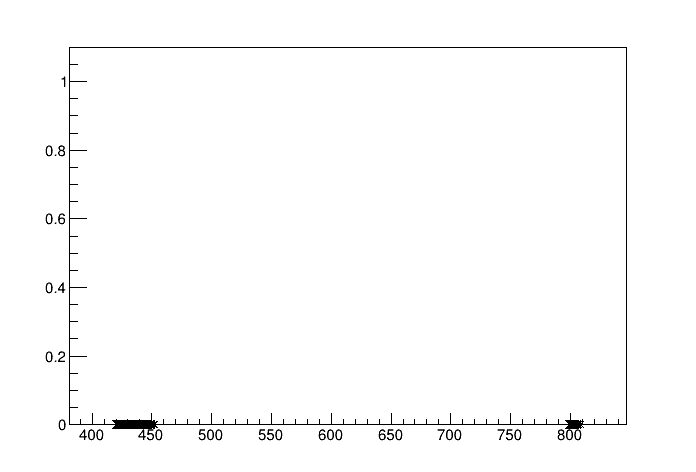

In [8]:
c1->Clear();
gt0S->SetMarkerStyle(3);
gt0S->Draw("ap");
c1->Draw();

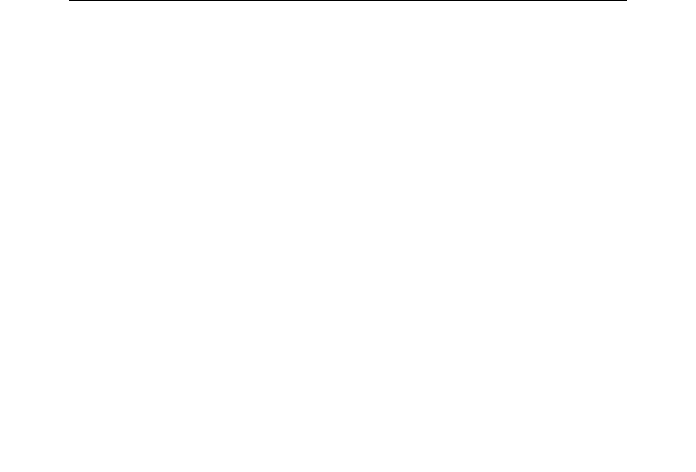

run 420~452 ave t0MB/t0dM = -nan
run 799~809 ave t0MB/t0dM = -nan


In [9]:
c1->Clear();
gMBtoM->SetMarkerStyle(3);
gMBtoM->Draw("ap");
c1->Draw();
cout<<"run 420~452 ave t0MB/t0dM = "<<t0MBallall1/t0dMallall1<<'\n';
cout<<"run 799~809 ave t0MB/t0dM = "<<t0MBallall2/t0dMallall2<<'\n';

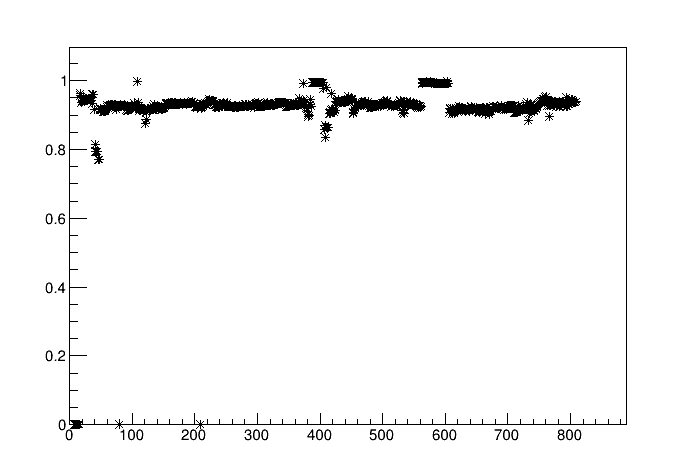

In [10]:
c1->Clear();
gaccpttedrate->SetMarkerStyle(3);
gaccpttedrate->Draw("ap");
c1->Draw();

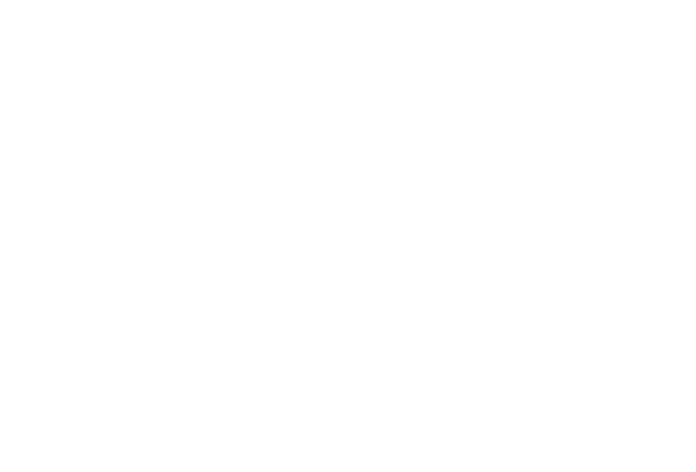

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


In [11]:
c1->Clear();
gCrate->SetMarkerStyle(3);
gCrate->Draw("ap");
c1->Draw();

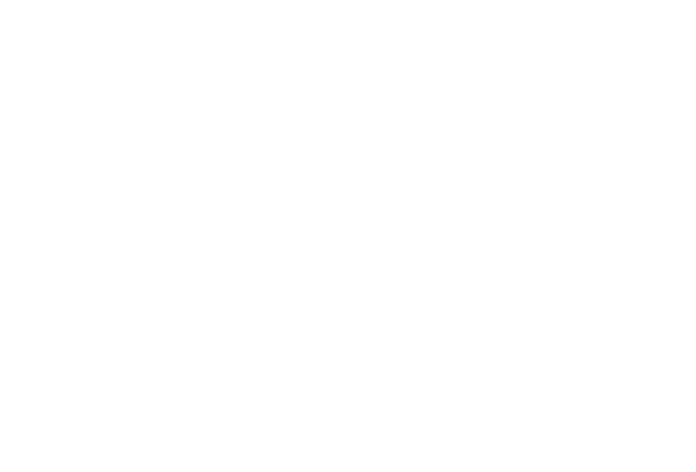

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


In [12]:
c1->Clear();
gtarrate->SetMarkerStyle(3);
gtarrate->Draw("ap");
c1->Draw();

In [13]:
  TGraph *gt0realall=new TGraph();
Int_t countrealall=0;
long C15all1=0,C15all2=0;
  for(Int_t ii=0;ii<810;ii++){
      t0realall[ii]=t0sall[ii]*Crate[ii]*tarrate[ii]*accpttedrate[ii]*(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii]);
      if((ii>=420&&ii<=452)||(ii>=799&&ii<=808))cout<<ii<<'\t'<<t0realall[ii]<<'\t'<<t0sall[ii]<<'\t'<<Crate[ii]<<'\t'<<tarrate[ii]<<'\t'<<accpttedrate[ii]<<'\t'<<(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii])<<'\n';
      if((ii>=420&&ii<=452)||(ii>=799&&ii<=808))gt0realall->SetPoint(countrealall++,ii,t0realall[ii]);
      if(ii>=420&&ii<=452)C15all1+=t0realall[ii];
      if(ii>=799&&ii<=808)C15all2+=t0realall[ii];
  }

420	-nan	0	0	0	0.915013	-nan
421	-nan	0	0	0	0.911915	-nan
422	-nan	0	0	0	0.910549	-nan
423	-nan	0	0	0	0.908006	-nan
424	-nan	0	0	0	0.911808	-nan
425	-nan	0	0	0	0.938468	-nan
426	-nan	0	0	0	0.936721	-nan
427	-nan	0	0	0	0.93774	-nan
428	-nan	0	0	0	0.940111	-nan
429	-nan	0	0	0	0.941674	-nan
430	-nan	0	0	0	0.943818	-nan
431	-nan	0	0	0	0.940279	-nan
432	-nan	0	0	0	0.937278	-nan
433	-nan	0	0	0	0.93682	-nan
434	-nan	0	0	0	0.937636	-nan
435	-nan	0	0	0	0.938454	-nan
436	-nan	0	0	0	0.940246	-nan
437	-nan	0	0	0	0.937952	-nan
438	-nan	0	0	0	0.937269	-nan
439	-nan	0	0	0	0.936788	-nan
440	-nan	0	0	0	0.936605	-nan
441	-nan	0	0	0	0.939538	-nan
442	-nan	0	0	0	0.942165	-nan
443	-nan	0	0	0	0.943681	-nan
444	-nan	0	0	0	0.941314	-nan
445	-nan	0	0	0	0.95248	-nan
446	-nan	0	0	0	0.943904	-nan
447	-nan	0	0	0	0.943105	-nan
448	-nan	0	0	0	0.945673	-nan
449	-nan	0	0	0	0.945732	-nan
450	-nan	0	0	0	0.947211	-nan
451	-nan	0	0	0	0.948249	-nan
452	-nan	0	0	0	0.946266	-nan
799	-nan	0	0	0	0.930963	-nan
800	-nan	0	0	0	0.

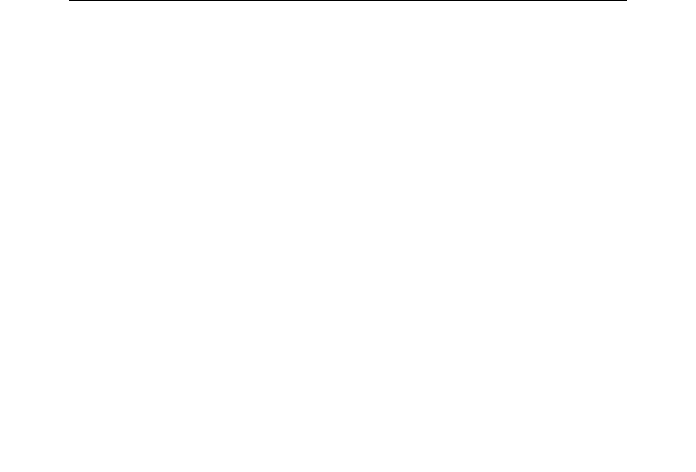

-9223372036854775808
-9223372036854775808


In [14]:
c1->Clear();
gt0realall->SetMarkerStyle(3);
gt0realall->Draw("ap");
c1->Draw();
cout<<C15all1<<'\n';
cout<<C15all2<<'\n';

In [15]:
/*
        ofstream write1;
        TString outfileName = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/15C_CH2_tafandt1.txt");
        write1.open(outfileName.Data(), ios::out);
        for(Int_t i=420; i<=452; i++)write1<< i<< "\t" <<setprecision(10)<<xtafall[i]<<"\t" <<setprecision(10)<<vtafall[i]<<'\t'<<setprecision(10)<<t1d1all[i]<<endl;
        for(Int_t i=799; i<=809; i++)write1<< i<< "\t" <<setprecision(10)<<xtafall[i]<<"\t" <<setprecision(10)<<vtafall[i]<<'\t'<<setprecision(10)<<t1d1all[i]<<endl;
        write1.close();
*/